In [147]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import seaborn as sbn

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.3f}'.format

In [2]:
!unzip -q drive/MyDrive/___Work/data_dec_1.zip

In [2]:
def reminval(DF):
  DF.Year[(DF.Year < 1979) | (DF.Year > 2020)] = pd.NA
  DF.Month[(DF.Month < 1) | (DF.Month > 12)] = pd.NA
  DF.Record[(DF.Record < 1) | (DF.Record > 3)] = pd.NA
  DF.Latitude[(DF.Latitude < 50) | (DF.Latitude > 55)] = pd.NA
  DF.Longitude[(DF.Longitude < 143) | (DF.Longitude > 146)] = pd.NA
  return DF

In [ ]:
columns = ['Year', 'Month', 'Record', 'Latitude', 'Longitude', 'Value']
dtype = {'Year': int, 'Month':int, 'Record':int,
         'Lattitude': float, 'Longitude':float, 'Value': float}

wind_n = pd.read_csv('reg01_nth_d_avg.csv', delimiter=';', dtype=dtype)
wind_w = pd.read_csv('reg01_wst_d_avg.csv', delimiter=';',
                     on_bad_lines='skip')
tp_sum = pd.read_csv('reg01_tps_d_sum.csv', delimiter=';',
                     on_bad_lines='skip', encoding='unicode_escape')
tn_sum = pd.read_csv('reg01_tng_d_sum.csv', delimiter=';')
tp_sum_d = pd.read_csv('reg01_tps_d_sum_dly.csv', delimiter=';')
tn_sum_d = pd.read_csv('reg01_tng_d_sum_dly.csv', delimiter=';',
                       on_bad_lines='skip', encoding='unicode_escape')

# Wind N

In [4]:
wind_n.describe()

,Year,Month,Record,Latitude,Longitude,Value,Count
count,412776.000,412776.000,412776.000,412776.000,412776.000,412776.000,412776.000
mean,1999.500,6.500,2.000,52.500,144.500,-258.361,145.940
std,12.121,3.452,0.816,1.514,0.935,2868.945,63.650
min,1979.000,1.000,1.000,50.000,143.000,-32767.000,0.000
25%,1989.000,3.750,1.000,51.250,143.750,-6.838,98.000
50%,1999.500,6.500,2.000,52.500,144.500,-5.043,150.000
75%,2010.000,9.250,3.000,53.750,145.250,-3.320,199.000
max,2020.000,12.000,3.000,55.000,146.000,-0.001,240.000


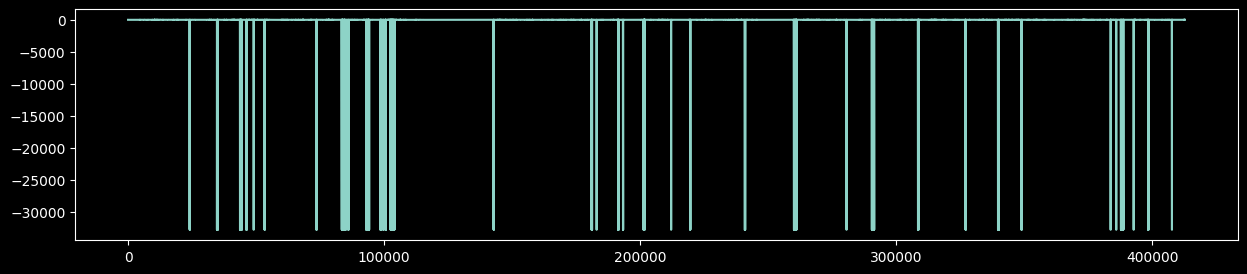

In [6]:
plt.style.use('dark_background')
wind_n.Value.plot(figsize=(15, 3));

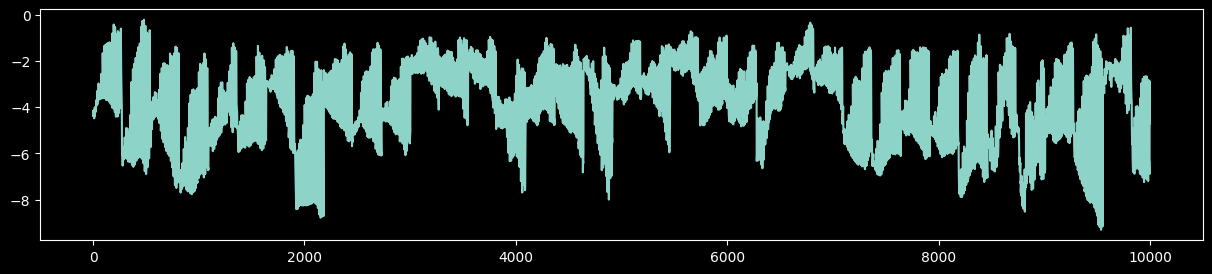

In [7]:
wind_n.Value[:10000].plot(figsize=(15, 3));

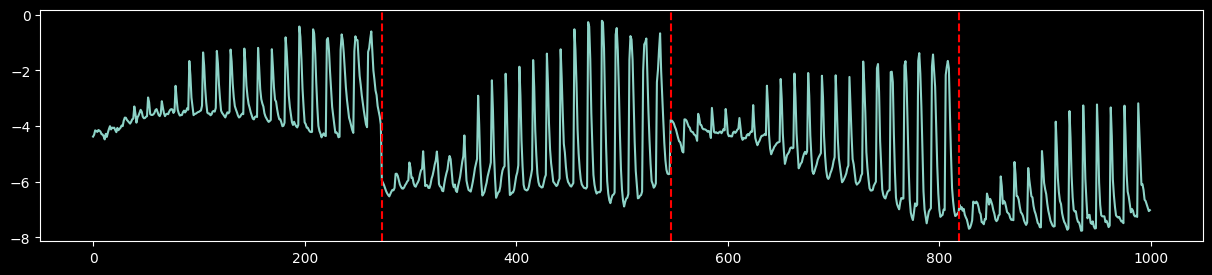

In [8]:
wind_n.Value[:1000].plot(figsize=(15, 3));
for i in [273, 273*2, 273*3]:
  plt.axvline(i, c='red', ls='--')

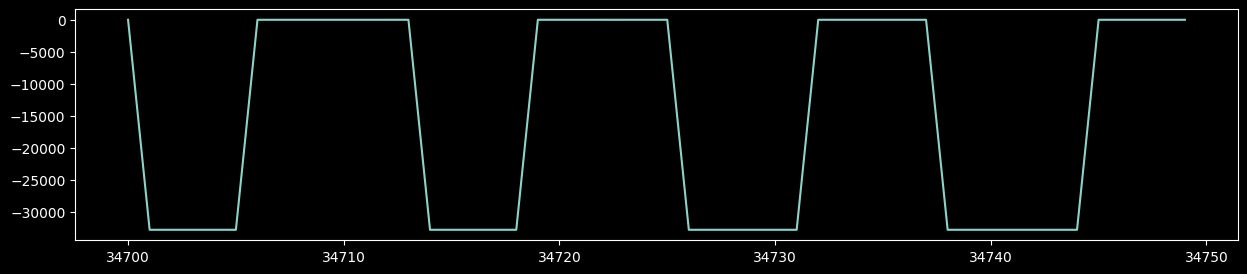

In [9]:
wind_n.Value[34700:34750].plot(figsize=(15, 3));

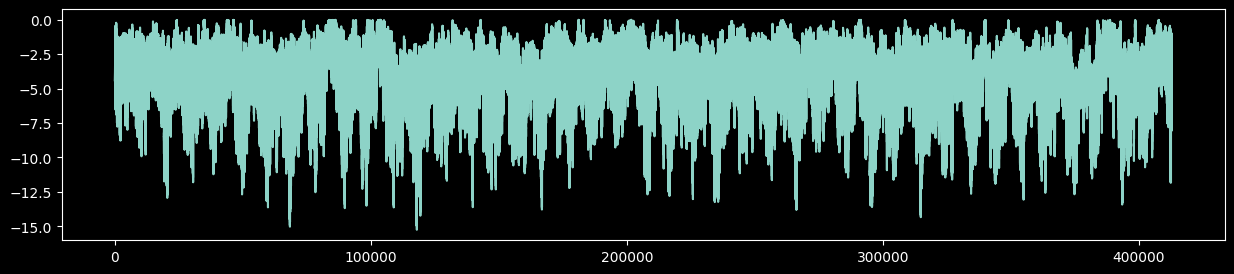

In [10]:
wind_n.Value[wind_n.Value == -32767] = pd.NA
wind_n = wind_n.fillna(method='ffill')
wind_n.Value.plot(figsize=(15, 3));

In [11]:
wind_n = wind_n.drop('Count', axis=1)
wind_n.describe()

,Year,Month,Record,Latitude,Longitude,Value
count,412776.000,412776.000,412776.000,412776.000,412776.000,412776.000
mean,1999.500,6.500,2.000,52.500,144.500,-5.141
std,12.121,3.452,0.816,1.514,0.935,2.462
min,1979.000,1.000,1.000,50.000,143.000,-15.254
25%,1989.000,3.750,1.000,51.250,143.750,-6.773
50%,1999.500,6.500,2.000,52.500,144.500,-4.994
75%,2010.000,9.250,3.000,53.750,145.250,-3.267
max,2020.000,12.000,3.000,55.000,146.000,-0.001


# Wind W

In [12]:
for i in columns:
  wind_w[i] = pd.to_numeric(wind_w[i], errors='coerce')
wind_w = wind_w.fillna(method='ffill')
wind_w.describe()

,Year,Month,Record,Latitude,Longitude,Value
count,412764.000,412764.000,412764.000,412764.000,412764.000,412764.000
mean,2004.743,6.519,2.010,52.504,144.480,-264.360
std,1023.037,5.726,3.817,1.774,2.099,2955.974
min,1.000,-51.278,-59.695,-55.277,-59.660,-32767.000
25%,1989.000,4.000,1.000,51.250,143.750,2.484
50%,2000.000,7.000,2.000,52.500,144.500,4.029
75%,2010.000,10.000,3.000,53.750,145.250,6.078
max,200194.000,1953.210,1952.340,146.000,146.000,15.529


In [13]:
wind_w = reminval(wind_w)
wind_w.Value[wind_w.Value == -32767] = pd.NA
wind_w = wind_w.fillna(method='ffill')
wind_w.describe()

,Year,Month,Record,Latitude,Longitude,Value
count,412764.000,412764.000,412764.000,412764.000,412764.000,412764.000
mean,1999.501,6.500,2.000,52.500,144.500,4.440
std,12.121,3.452,0.817,1.514,0.935,2.592
min,1979.000,1.000,1.000,50.000,143.000,-59.260
25%,1989.000,4.000,1.000,51.250,143.750,2.485
50%,2000.000,7.000,2.000,52.500,144.500,4.030
75%,2010.000,10.000,3.000,53.750,145.250,6.078
max,2020.000,12.000,3.000,55.000,146.000,15.529


# Temperature

In [14]:
tp_sum_d = reminval(tp_sum_d)
tp_sum_d.Value[tp_sum_d.Value == -32767] = 0
tp_sum_d = tp_sum_d.fillna(method='ffill')
tp_sum_d.describe()

,Year,Month,Record,Latitude,Longitude,Value,Count
count,412776.000,412776.000,412776.000,412776.000,412776.000,412776.000,412776.000
mean,1999.500,6.500,2.000,52.500,144.500,36.984,4.969
std,12.121,3.452,0.816,1.514,0.935,47.300,4.739
min,1979.000,1.000,1.000,50.000,143.000,0.000,0.000
25%,1989.000,3.750,1.000,51.250,143.750,0.000,0.000
50%,1999.500,6.500,2.000,52.500,144.500,5.082,4.000
75%,2010.000,9.250,3.000,53.750,145.250,75.776,10.000
max,2020.000,12.000,3.000,55.000,146.000,197.371,10.000


In [15]:
for i in list(tn_sum_d.columns.values):
  tn_sum_d[i] = pd.to_numeric(tn_sum_d[i], errors='coerce')
tn_sum_d = reminval(tn_sum_d)
tn_sum_d.Value[tn_sum_d.Value == -32767] = 0
tn_sum_d.Value[tn_sum_d.Value > 0] = pd.NA
tn_sum_d = tn_sum_d.fillna(method='ffill')
tn_sum_d.describe()

,Year,Month,Record,Latitude,Longitude,Value,Count
count,412537.000,412537.000,412537.000,412537.000,412537.000,412537.000,412537.000
mean,1999.499,6.499,2.000,52.499,144.500,-44.815,4.985
std,12.124,3.452,0.816,1.514,0.935,59.971,4.697
min,1979.000,1.000,1.000,50.000,143.000,-288.907,0.000
25%,1989.000,3.000,1.000,51.250,143.750,-82.825,0.000
50%,1999.000,6.000,2.000,52.500,144.500,-7.156,6.000
75%,2010.000,9.000,3.000,53.750,145.250,0.000,10.000
max,2020.000,12.000,3.000,55.000,146.000,0.000,19.000


In [16]:
data_t = tp_sum_d.merge(tn_sum_d, on=['Year', 'Month', 'Record', 'Latitude', 'Longitude'])
data_t['Count_sum'] = data_t.Count_x + data_t.Count_y
data_t.describe()

,Year,Month,Record,Latitude,Longitude,Value_x,Count_x,Value_y,Count_y,Count_sum
count,412470.000,412470.000,412470.000,412470.000,412470.000,412470.000,412470.000,412470.000,412470.000,412470.000
mean,1999.499,6.499,2.000,52.499,144.500,36.973,4.968,-44.817,4.984,9.952
std,12.125,3.452,0.816,1.514,0.935,47.300,4.739,59.975,4.697,0.300
min,1979.000,1.000,1.000,50.000,143.000,0.000,0.000,-288.907,0.000,0.000
25%,1989.000,3.000,1.000,51.250,143.750,0.000,0.000,-82.841,0.000,10.000
50%,1999.000,6.000,2.000,52.500,144.500,5.074,4.000,-7.143,6.000,10.000
75%,2010.000,9.000,3.000,53.750,145.250,75.730,10.000,0.000,10.000,10.000
max,2020.000,12.000,3.000,55.000,146.000,197.371,10.000,0.000,19.000,20.000


In [17]:
data_t.Count_sum[(data_t.Count_sum > 10) | (data_t.Count_sum <= 1)] = 10
data_t['Value_t'] = (data_t.Value_x + data_t.Value_y) / data_t.Count_sum
data_t = data_t.drop(['Value_x', 'Value_y', 'Count_x', 'Count_y'], axis=1)
data_t.describe()

,Year,Month,Record,Latitude,Longitude,Count_sum,Value_t
count,412470.000,412470.000,412470.000,412470.000,412470.000,412470.000,412470.000
mean,1999.499,6.499,2.000,52.499,144.500,9.952,-0.849
std,12.125,3.452,0.816,1.514,0.935,0.295,9.641
min,1979.000,1.000,1.000,50.000,143.000,7.000,-28.891
25%,1989.000,3.000,1.000,51.250,143.750,10.000,-8.391
50%,1999.000,6.000,2.000,52.500,144.500,10.000,-0.209
75%,2010.000,9.000,3.000,53.750,145.250,10.000,7.573
max,2020.000,12.000,3.000,55.000,146.000,10.000,19.737


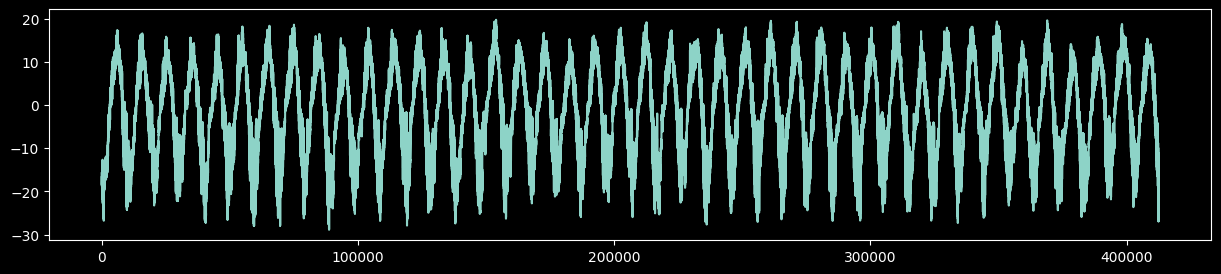

In [18]:
data_t.Value_t.plot(figsize=(15, 3));

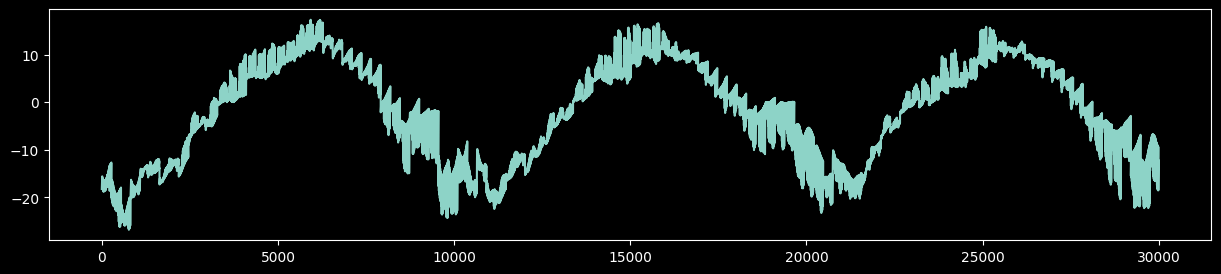

In [19]:
data_t.Value_t[:30000].plot(figsize=(15, 3));

# Final Data

In [20]:
data = wind_n.merge(wind_w, on=['Year', 'Month', 'Record', 'Latitude', 'Longitude'])
data.describe()

,Year,Month,Record,Latitude,Longitude,Value_x,Value_y
count,412741.000,412741.000,412741.000,412741.000,412741.000,412741.000,412741.000
mean,1999.500,6.501,2.000,52.500,144.500,-5.141,4.441
std,12.121,3.452,0.817,1.514,0.935,2.462,2.581
min,1979.000,1.000,1.000,50.000,143.000,-15.254,-59.260
25%,1989.000,4.000,1.000,51.250,143.750,-6.774,2.485
50%,2000.000,7.000,2.000,52.500,144.500,-4.994,4.030
75%,2010.000,10.000,3.000,53.750,145.250,-3.267,6.078
max,2020.000,12.000,3.000,55.000,146.000,-0.001,15.529


In [21]:
data_t = data_t.drop('Count_sum', axis=1)
data = data.merge(data_t, on=['Year', 'Month', 'Record', 'Latitude', 'Longitude'])
data.describe()

,Year,Month,Record,Latitude,Longitude,Value_x,Value_y,Value_t
count,412578.000,412578.000,412578.000,412578.000,412578.000,412578.000,412578.000,412578.000
mean,1999.499,6.499,2.000,52.500,144.500,-5.140,4.438,-0.847
std,12.124,3.452,0.817,1.514,0.935,2.461,2.630,9.636
min,1979.000,1.000,1.000,50.000,143.000,-15.254,-58.778,-28.891
25%,1989.000,3.000,1.000,51.250,143.750,-6.773,2.484,-8.378
50%,2000.000,6.000,2.000,52.500,144.500,-4.992,4.030,-0.214
75%,2010.000,9.000,3.000,53.750,145.250,-3.267,6.079,7.571
max,2020.000,12.000,3.000,55.000,146.000,-0.001,15.529,19.737


In [22]:
data[['Value_x', 'Value_y', 'Value_t']].corr()

,Value_x,Value_y,Value_t
Value_x,1.000,-0.501,0.361
Value_y,-0.501,1.000,-0.370
Value_t,0.361,-0.370,1.000


In [23]:
c = list(data.columns.values)
c.remove('Count')
data.to_csv('data.csv', columns=c)

# Dataset

In [52]:
def get_indx(delay=1, dec_x=3):
  n, res = delay+dec_x, []
  for y in range(1979, 2021):
    for m in range(1, 13):
      for d in range(1, 4):
        time = (y-1979)*36 + (m-1)*3 + d-1 - n
        if time >= 0:
          x_t = []
          for i in range(time, time+dec_x):
            year, month, decade = i//36+1979, i%36//3+1, i%3+1
            x_t.append((year, month, decade))
          res.append((x_t, (y, m, d)))
  return res

In [143]:
def build_ds(DF, inds, target=(53.0, 143.25)):
  trg = DF[(DF.Latitude == target[0]) & (DF.Longitude == target[1])]
  dt = DF[(DF.Latitude != target[0]) | (DF.Longitude != target[1])]
  res = pd.DataFrame()
  for i in inds:
    y = trg.loc[(trg.Year == i[1][0]) & (trg.Month == i[1][1]) & (trg.Record == i[1][2])]
    X, t = [], True
    for j in i[0]:
      X.append(dt.loc[(dt.Year == j[0]) & (dt.Month == j[1]) & (dt.Record == j[2])])
      if X[-1].empty: t = False
    if t and not y.empty:
      row = {'y': float(y.Value_t)}
      for d, x in enumerate(X):
        for p, j in enumerate(x.Value_x):
          row['x_V_'+str(d)+'_'+str(p)] = j
        for p, j in enumerate(x.Value_y):
          row['x_U_'+str(d)+'_'+str(p)] = j
        for p, j in enumerate(x.Value_t):
          row['x_T_'+str(d)+'_'+str(p)] = j
      row = pd.DataFrame([row])
      res = pd.concat([res, row], ignore_index=True)
  return res

In [139]:
data = pd.read_csv('data.csv', index_col=0)
data = data[(data.Latitude >= 52.75) & (data.Latitude <= 53.25)]
data = data[(data.Longitude >= 143.0) & (data.Longitude <= 143.5)]
data.describe()

,Year,Month,Record,Latitude,Longitude,Value_x,Value_y,Value_t
count,13583.000,13583.000,13583.000,13583.000,13583.000,13583.000,13583.000,13583.000
mean,1999.497,6.501,2.001,53.000,143.250,-3.810,3.691,-1.819
std,12.132,3.453,0.816,0.204,0.204,1.801,2.129,11.494
min,1979.000,1.000,1.000,52.750,143.000,-12.906,0.000,-28.014
25%,1989.000,3.000,1.000,52.750,143.000,-4.885,2.094,-11.834
50%,1999.000,7.000,2.000,53.000,143.250,-3.628,3.321,-0.545
75%,2010.000,9.000,3.000,53.250,143.500,-2.540,4.918,8.626
max,2020.000,12.000,3.000,53.250,143.500,-0.013,12.922,19.084


In [144]:
inds = get_indx()
dataset = build_ds(data, inds)
dataset

,y,x_V_0_0,x_V_0_1,x_V_0_2,x_V_0_3,x_V_0_4,x_V_0_5,x_V_0_6,x_V_0_7,x_U_0_0,...,x_U_2_6,x_U_2_7,x_T_2_0,x_T_2_1,x_T_2_2,x_T_2_3,x_T_2_4,x_T_2_5,x_T_2_6,x_T_2_7
0,-14.329,-1.662,-2.174,-2.977,-1.354,-2.645,-1.300,-1.742,-2.497,5.345,...,3.943,5.259,-25.784,-25.294,-24.738,-25.962,-24.645,-25.826,-25.229,-24.416
1,-13.960,-2.910,-3.933,-5.360,-2.356,-4.998,-2.120,-3.153,-4.775,5.833,...,4.178,5.288,-19.895,-19.700,-19.446,-19.700,-19.154,-19.321,-19.108,-18.825
2,-16.372,-2.550,-3.263,-4.317,-2.308,-4.271,-2.113,-2.962,-4.268,3.898,...,3.901,4.715,-14.599,-14.586,-14.659,-14.355,-14.382,-14.070,-14.043,-14.154
3,-13.257,-3.842,-4.763,-5.861,-3.461,-5.781,-3.259,-4.379,-5.897,3.964,...,5.295,6.601,-14.058,-14.317,-14.586,-13.707,-14.166,-13.257,-13.490,-13.754
4,-12.048,-3.615,-4.334,-5.072,-3.141,-4.751,-2.936,-3.669,-4.604,3.882,...,3.070,4.052,-16.761,-16.593,-16.294,-16.524,-16.017,-15.877,-15.815,-15.653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-3.795,-3.164,-3.705,-4.211,-2.845,-4.065,-2.814,-3.274,-4.153,3.798,...,2.535,2.641,4.421,4.767,5.194,4.396,5.353,4.537,4.856,5.302
1496,-8.042,-1.474,-1.818,-2.599,-1.435,-2.252,-1.075,-1.415,-2.019,5.443,...,7.589,9.696,-2.010,-1.358,-0.485,-2.329,-0.594,-2.446,-1.721,-0.698
1497,-12.708,-3.024,-3.867,-5.116,-2.566,-4.940,-2.384,-3.425,-4.810,2.429,...,7.784,10.077,-4.228,-3.359,-2.188,-4.728,-2.394,-5.011,-4.031,-2.611
1498,-12.102,-3.011,-3.703,-4.800,-2.650,-4.237,-2.090,-2.838,-3.826,6.740,...,8.432,10.944,-8.721,-7.544,-5.915,-9.199,-6.325,-9.440,-8.325,-6.660


In [145]:
dataset.describe()

,y,x_V_0_0,x_V_0_1,x_V_0_2,x_V_0_3,x_V_0_4,x_V_0_5,x_V_0_6,x_V_0_7,x_U_0_0,...,x_U_2_6,x_U_2_7,x_T_2_0,x_T_2_1,x_T_2_2,x_T_2_3,x_T_2_4,x_T_2_5,x_T_2_6,x_T_2_7
count,1500.000,1500.000,1500.000,1500.000,1500.000,1499.000,1498.000,1498.000,1498.000,1500.000,...,1499.000,1499.000,1500.000,1500.000,1500.000,1500.000,1500.000,1499.000,1499.000,1499.000
mean,-1.809,-3.218,-3.933,-4.818,-2.950,-4.639,-2.845,-3.572,-4.648,3.235,...,3.424,4.256,-1.723,-1.772,-1.774,-1.758,-1.849,-1.677,-1.789,-1.912
std,11.617,1.386,1.665,2.022,1.301,1.961,1.279,1.545,1.969,1.699,...,1.850,2.396,12.340,11.465,10.397,12.501,10.447,12.412,11.547,10.395
min,-26.438,-8.496,-10.574,-12.906,-7.765,-12.485,-7.445,-9.480,-12.279,0.000,...,0.012,0.047,-27.918,-26.325,-25.026,-28.014,-25.090,-27.840,-26.392,-24.939
25%,-12.057,-4.059,-4.959,-6.055,-3.763,-5.842,-3.637,-4.514,-5.883,1.985,...,2.016,2.412,-12.721,-11.839,-10.620,-12.852,-10.681,-12.726,-12.017,-10.773
50%,-0.490,-3.120,-3.846,-4.707,-2.846,-4.552,-2.745,-3.480,-4.562,2.979,...,3.143,3.838,-0.563,-0.515,-0.634,-0.376,-0.597,-0.207,-0.304,-0.696
75%,8.978,-2.240,-2.777,-3.450,-2.031,-3.300,-1.954,-2.474,-3.279,4.310,...,4.627,5.847,9.604,8.867,7.310,9.743,7.404,9.611,8.944,7.358
max,18.161,-0.095,-0.044,-0.113,-0.107,-0.027,-0.101,-0.013,-0.013,9.449,...,10.512,12.900,18.799,18.007,17.631,19.002,17.459,19.084,18.119,17.272


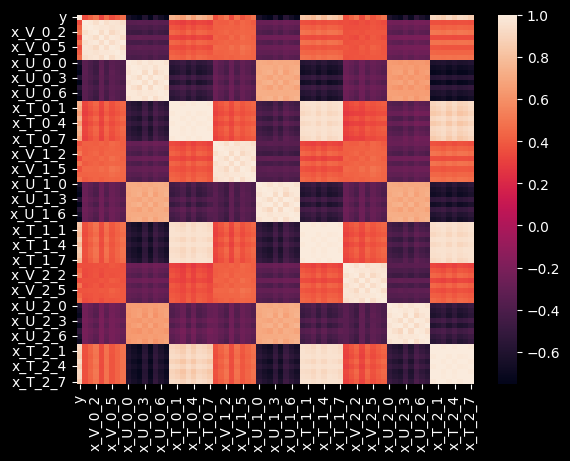

In [149]:
sbn.heatmap(dataset.corr());

In [152]:
dataset.to_csv('dataset.csv')